In [81]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


data = pd.read_csv('./data/passwords.csv')

data['length'] = data['password'].apply(len)
data['num_letters'] = data['password'].str.count(r'[A-Za-z]')
data['num_digits'] = data['password'].str.count(r'[0-9]')
data['pw_type'] = np.where(data['num_letters'] > 0, 
                           np.where(data['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                           'Digits Only')

le_cat = LabelEncoder()
le_pw = LabelEncoder()

data['pw_type'] = le_pw.fit_transform(data['pw_type'])
data['category'] = le_cat.fit_transform(data['category'])


X = data[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values

def convert_to_seconds(value, unit):
    unit_to_seconds = {
        'seconds': 1,
        'minutes': 60,
        'hours': 3600,
        'days': 86400,
        'weeks': 604800,
        'months': 2628000,  
        'years': 31536000
    }
    return value * unit_to_seconds[unit]


data['value_in_seconds'] = data.apply(lambda row: convert_to_seconds(row['value'], row['time_unit']), axis=1)

# y = data['offline_crack_sec'].values.reshape(-1, 1)  # target: offline 

y = data['value_in_seconds'].values.reshape(-1, 1) # online
y = np.log1p(data['value_in_seconds'].values.reshape(-1, 1))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log1p(y)  


# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n=2
regressor = TabNetRegressor(verbose=1, n_steps = 1, n_d = n, n_a = n)

regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=1000,
    patience=50,
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)



C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 183.16205| test_rmse: 13.21563|  0:00:00s
epoch 1  | loss: 182.19919| test_rmse: 13.18708|  0:00:00s
epoch 2  | loss: 179.9933| test_rmse: 13.14134|  0:00:00s
epoch 3  | loss: 177.88184| test_rmse: 13.10071|  0:00:00s
epoch 4  | loss: 176.56987| test_rmse: 13.07853|  0:00:00s
epoch 5  | loss: 174.70534| test_rmse: 13.03191|  0:00:00s
epoch 6  | loss: 172.90091| test_rmse: 12.98848|  0:00:00s
epoch 7  | loss: 172.09579| test_rmse: 12.92669|  0:00:00s
epoch 8  | loss: 170.65559| test_rmse: 12.86591|  0:00:00s
epoch 9  | loss: 169.11629| test_rmse: 12.81219|  0:00:00s
epoch 10 | loss: 167.35727| test_rmse: 12.76214|  0:00:00s
epoch 11 | loss: 165.24159| test_rmse: 12.71419|  0:00:00s
epoch 12 | loss: 162.96741| test_rmse: 12.65596|  0:00:00s
epoch 13 | loss: 159.9632| test_rmse: 12.58235|  0:00:00s
epoch 14 | loss: 157.34679| test_rmse: 12.49812|  0:00:00s
epoch 15 | loss: 153.3082| test_rmse: 12.39612|  0:00:00s
epoch 16 | loss: 149.47554| test_rmse: 12.27345|  0:00:00s


epoch 147| loss: 1.12386 | test_rmse: 0.73748 |  0:00:03s
epoch 148| loss: 1.15193 | test_rmse: 0.6708  |  0:00:03s
epoch 149| loss: 1.15716 | test_rmse: 0.61205 |  0:00:03s
epoch 150| loss: 1.19583 | test_rmse: 0.73528 |  0:00:03s
epoch 151| loss: 0.96744 | test_rmse: 1.00562 |  0:00:03s
epoch 152| loss: 1.02429 | test_rmse: 1.19108 |  0:00:03s
epoch 153| loss: 1.36354 | test_rmse: 1.26518 |  0:00:03s
epoch 154| loss: 1.57016 | test_rmse: 1.21332 |  0:00:03s
epoch 155| loss: 1.04625 | test_rmse: 1.12958 |  0:00:03s
epoch 156| loss: 0.80639 | test_rmse: 1.11313 |  0:00:03s
epoch 157| loss: 1.25499 | test_rmse: 1.08889 |  0:00:03s
epoch 158| loss: 0.93834 | test_rmse: 1.0607  |  0:00:03s
epoch 159| loss: 0.95618 | test_rmse: 0.94728 |  0:00:03s
epoch 160| loss: 0.99535 | test_rmse: 0.8793  |  0:00:03s
epoch 161| loss: 1.15389 | test_rmse: 0.89884 |  0:00:03s
epoch 162| loss: 0.70817 | test_rmse: 0.99099 |  0:00:03s
epoch 163| loss: 0.76474 | test_rmse: 1.11596 |  0:00:03s
epoch 164| los

C:\Users\SKN\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [65]:
visual = pd.DataFrame()
visual['feature'] = ['category', 'length', 'num_letters', 'num_digits', 'pw_type']
visual['importance'] = regressor.feature_importances_
visual

,feature,importance
0,category,0.006963
1,length,0.488085
2,num_letters,0.018719
3,num_digits,0.024337
4,pw_type,0.461896


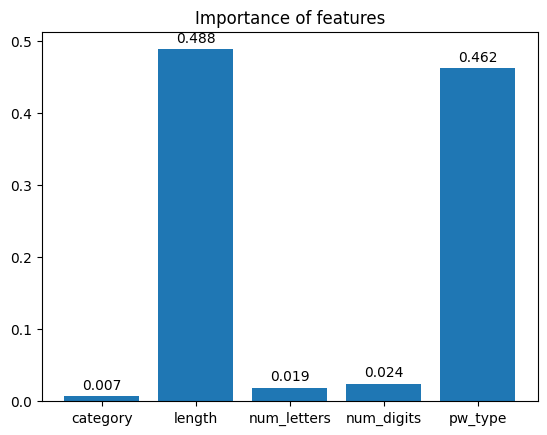

In [77]:
import matplotlib.pyplot as plt
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()
    
plot_bar(visual['feature'], visual['importance'], "Importance of features")

In [69]:
# predict some passwords

passwords = [
    'password',
    'passw0rd',
    'passsw0rd',
    'a7q2y6i'
]

passwords_df = pd.DataFrame({'password': passwords})

passwords_df['category'] = ['password-related', 'password-related', 'password-related', 'password-related']
passwords_df['length'] = passwords_df['password'].apply(len)
passwords_df['num_letters'] = passwords_df['password'].str.count(r'[A-Za-z]')
passwords_df['num_digits'] = passwords_df['password'].str.count(r'[0-9]')
passwords_df['pw_type'] = np.where(passwords_df['num_letters'] > 0, 
                                    np.where(passwords_df['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                                    'Digits Only')

passwords_df['pw_type'] = le_pw.transform(passwords_df['pw_type'])
passwords_df['category'] = le_cat.transform(passwords_df['category'])

X = passwords_df[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


X_passwords_scaled = scaler.transform(X)

y_pred = regressor.predict(X_passwords_scaled)

print(y_pred)


[[ 2.1085298]
 [27.742085 ]
 [67.27478  ]
 [ 0.4539634]]


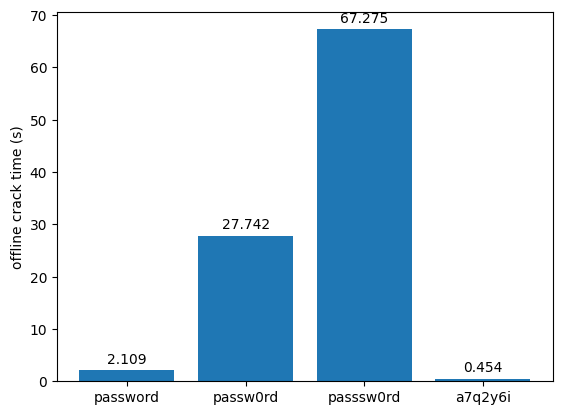

In [76]:
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    ax.set_ylabel('offline crack time (s)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()
    
plot_bar(passwords, y_pred.reshape(-1))

[[19.282248]
 [20.12811 ]
 [18.582008]]


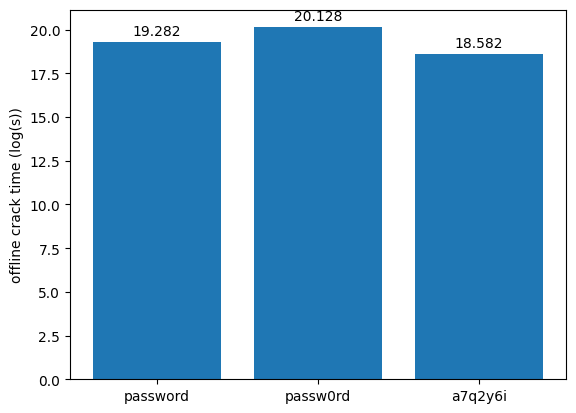

In [88]:
# predict some passwords (online crack)

passwords = [
    'password',
    'passw0rd',
    'a7q2y6i'
]

passwords_df = pd.DataFrame({'password': passwords})

passwords_df['category'] = ['password-related', 'password-related', 'password-related']
passwords_df['length'] = passwords_df['password'].apply(len)
passwords_df['num_letters'] = passwords_df['password'].str.count(r'[A-Za-z]')
passwords_df['num_digits'] = passwords_df['password'].str.count(r'[0-9]')
passwords_df['pw_type'] = np.where(passwords_df['num_letters'] > 0, 
                                    np.where(passwords_df['num_digits'] > 0, 'Letters and Digits', 'Letters Only'), 
                                    'Digits Only')

passwords_df['pw_type'] = le_pw.transform(passwords_df['pw_type'])
passwords_df['category'] = le_cat.transform(passwords_df['category'])

X = passwords_df[['category', 'length', 'num_letters', 'num_digits', 'pw_type']].values


X_passwords_scaled = scaler.transform(X)

y_pred = regressor.predict(X_passwords_scaled)

print(y_pred)
def plot_bar(x, y, title = ""):
    fig, ax = plt.subplots()
    bars = ax.bar(x, y)

    ax.set_ylabel('offline crack time (log(s))')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.title(title)
    plt.show()
    
plot_bar(passwords, y_pred.reshape(-1))